#### What it does:

###### Lasso is a regression analysis method that performs both variable selection and regularization to enhance the prediction accuracy and interpretability of the statistical model it produces.
###### Lasso regression performs L1 regularization, which adds a penalty equal to the absolute value of themagnitude of coefficients. This type of regularization can result in sparse models with few coefficients; some coefficients can become zero and eliminated from the model. Larger penalties result in coefficient values closer to zero, which is ideal for producing simpler models. On the other hand,

#### Why it's useful:

###### It helps find the most important features for your model by shrinking the coefficients of less important features towards zero.
###### Can improve model performance by reducing overfitting.
###### Leads to simpler, more interpretable models with fewer features.

### Mathematical Formula:

#### The Lasso regression objective function is:

Minimize:  Sum of Squared Errors + λ * Sum of Absolute Value of Coefficients

###### Sum of Squared Errors: The usual least squares error in regression.
###### λ (lambda): The regularization parameter. Controls the strength of the penalty. Higher values of λ result in stronger regularization and sparser models (more coefficients pushed to zero).

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV

In [30]:
# We select MinMaxScaled data, because it gives more accuracy and less loss, despite too little latencycompared to StandardScaling
df = pd.read_csv("C:/Users/DilshodbekMX/PycharmProjects/Cyber/Normalization/MinMaxScaling.csv", low_memory=False)
df.head()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,0.000000,0.091080,0.328101,0.239987,0.794107,0.604403,0.006760,0.352941,0.246193,...,0.454545,0.001253,0.002184,0.004293,0.000644,0.083017,0.001615,0.083439,0.081228,1
1,1,0.000006,0.624611,0.245482,0.288850,0.791299,0.223591,0.000809,1.000000,0.214860,...,0.181818,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
2,2,0.000012,0.032264,0.084343,0.446652,0.521897,0.214884,0.006760,0.352941,0.083647,...,0.000000,0.000618,0.001209,0.003237,0.000379,0.080068,0.021086,0.083531,0.043356,1
3,3,0.000017,0.297427,0.640548,0.300064,0.001221,0.328405,0.576220,0.352941,0.167571,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
4,4,0.000023,0.445803,0.010234,0.170939,0.794717,0.261212,0.051714,0.352941,0.905422,...,0.454545,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1


In [31]:
X = df.drop("Label", axis=1)  # Features
y = df["Label"]

In [48]:
# Store original column names
original_columns = X.columns

In [32]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [44]:
sel_ = SelectFromModel(Lasso(alpha=0.00005))
sel_.fit(X_train, y_train)

SelectFromModel(estimator=Lasso(alpha=5e-05))

In [45]:
sel_.get_support()

array([False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False, False, False, False,  True,  True,  True,
       False,  True,  True,  True,  True, False, False, False,  True,
       False, False,  True, False,  True,  True, False,  True, False,
        True,  True, False,  True,  True,  True, False,  True,  True,
       False, False, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False,  True,  True, False,
       False, False, False,  True,  True, False,  True, False, False,
        True, False, False, False,  True,  True])

In [46]:
# make a list with the selected features and print the outputs
selected_feat = X_train.columns[(sel_.get_support())]

print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
    np.sum(sel_.estimator_.coef_ == 0)))

total features: 78
selected features: 46
features with coefficients shrank to zero: 31


In [50]:
# Get the selected feature names
selected_features = original_columns[sel_.get_support()]
selected_features

Index(['Unnamed: 0', 'Flow ID', 'Src IP', 'Src Port', 'Dst IP', 'Dst Port',
       'Protocol', 'Timestamp', 'Flow Duration', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Bwd Pkt Len Max',
       'Bwd Pkt Len Min', 'Bwd Pkt Len Mean', 'Bwd Pkt Len Std',
       'Flow IAT Std', 'Fwd IAT Tot', 'Fwd IAT Std', 'Fwd IAT Max',
       'Bwd IAT Tot', 'Bwd IAT Std', 'Bwd IAT Max', 'Fwd PSH Flags',
       'Bwd PSH Flags', 'Fwd Header Len', 'Fwd Pkts/s', 'Bwd Pkts/s',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag Count', 'ECE Flag Cnt', 'Fwd Seg Size Avg',
       'Bwd Seg Size Avg', 'Init Fwd Win Byts', 'Init Bwd Win Byts',
       'Fwd Seg Size Min', 'Active Max', 'Idle Max', 'Idle Min'],
      dtype='object')

In [53]:
# Identify dropped columns
dropped_columns = original_columns.difference(selected_features)

print("Dropped Columns:")
print(dropped_columns)

Dropped Columns:
Index(['Active Mean', 'Active Min', 'Active Std', 'Bwd Header Len',
       'Bwd IAT Mean', 'Bwd IAT Min', 'Down/Up Ratio', 'Flow Byts/s',
       'Flow IAT Max', 'Flow IAT Mean', 'Flow IAT Min', 'Flow Pkts/s',
       'Fwd Act Data Pkts', 'Fwd IAT Mean', 'Fwd IAT Min', 'Fwd Pkt Len Std',
       'Idle Mean', 'Idle Std', 'Pkt Len Max', 'Pkt Len Mean', 'Pkt Len Min',
       'Pkt Size Avg', 'Subflow Bwd Byts', 'Subflow Bwd Pkts',
       'Subflow Fwd Byts', 'Subflow Fwd Pkts', 'Tot Bwd Pkts', 'Tot Fwd Pkts',
       'TotLen Bwd Pkts', 'TotLen Fwd Pkts', 'Unnamed: 0.1', 'Unnamed: 0.2'],
      dtype='object')


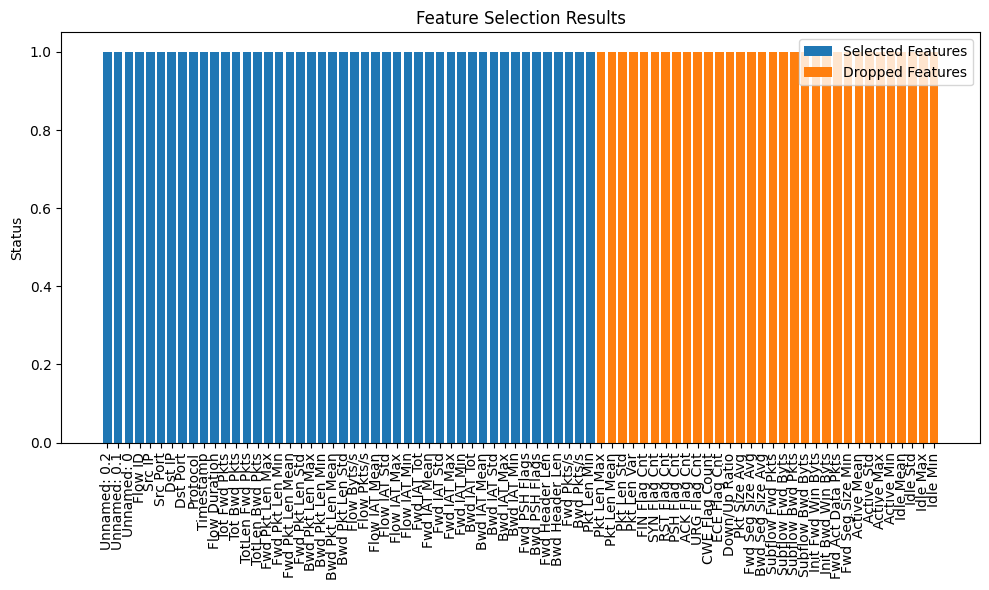

In [54]:
# Plotting
plt.figure(figsize=(10, 6))
plt.bar(range(len(selected_feat)), np.ones(len(selected_feat)), label='Selected Features')
plt.bar(range(len(selected_features), len(original_columns)), np.ones(len(dropped_columns)), label='Dropped Features')
plt.xticks(range(len(original_columns)), original_columns, rotation=90)
plt.ylabel('Status')
plt.title('Feature Selection Results')
plt.legend()
plt.tight_layout()
plt.show()

In [59]:
# Filter columns based on the selected features list
df_selected = df[[col for col in df.columns if col in list(selected_features)]]

(df_selected) 

,Unnamed: 0,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Fwd Pkt Len Max,...,CWE Flag Count,ECE Flag Cnt,Fwd Seg Size Avg,Bwd Seg Size Avg,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Seg Size Min,Active Max,Idle Max,Idle Min
0,0.091080,0.328101,0.239987,0.794107,0.604403,0.006760,0.352941,0.246193,0.504694,0.044461,...,0.0,0.0,0.020035,0.116214,0.125015,0.474380,0.454545,0.004293,0.083439,0.081228
1,0.624611,0.245482,0.288850,0.791299,0.223591,0.000809,1.000000,0.214860,0.000015,0.003574,...,0.0,0.0,0.013879,0.051639,0.000000,0.000000,0.181818,0.000000,0.000000,0.000000
2,0.032264,0.084343,0.446652,0.521897,0.214884,0.006760,0.352941,0.083647,0.967061,0.162304,...,0.0,0.0,0.096874,0.115361,0.000000,0.007950,0.000000,0.003237,0.083531,0.043356
3,0.297427,0.640548,0.300064,0.001221,0.328405,0.576220,0.352941,0.167571,0.036977,0.077703,...,0.0,0.0,0.075450,0.040329,0.000000,0.003235,0.000000,0.000000,0.000000,0.000000
4,0.445803,0.010234,0.170939,0.794717,0.261212,0.051714,0.352941,0.905422,0.015704,0.056262,...,0.0,1.0,0.041172,0.103213,0.125015,0.959061,0.454545,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172004,0.241651,0.880275,0.300384,0.001221,0.328569,0.846522,0.352941,0.973918,0.000320,0.077703,...,1.0,1.0,0.075450,0.041585,0.000000,0.500015,0.000000,0.000000,0.000000,0.000000
172005,0.155045,0.172553,0.264819,0.806162,0.223591,0.000809,1.000000,0.820418,0.000113,0.002493,...,0.0,0.0,0.009683,0.060322,0.000000,0.000000,0.181818,0.000000,0.000000,0.000000
172006,0.164479,0.865995,0.300384,0.001221,0.328076,0.909101,0.352941,0.931253,0.000010,0.077703,...,1.0,1.0,0.075450,0.053162,0.000000,0.500015,0.000000,0.000000,0.000000,0.000000
172007,0.348366,0.360296,0.247997,0.783197,0.482011,0.006760,0.352941,0.861877,0.976377,0.016289,...,0.0,1.0,0.014798,0.154834,0.125015,0.002701,0.454545,0.006237,0.484614,0.484112


In [60]:
df_selected.to_csv("LASSOSelection.csv")